In [1]:
# Add root dir to sys.path
import sys
from pathlib import Path

# print(Path.cwd().parent)
sys.path.append(str(Path.cwd().parent))  # or adjust as needed

import numpy as np
import pandas as pd


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from src.core.backprop import BackProp
from src.core.layers import NeuNet
from src.core.feed_forward import FeedForward
from src.core.learner import Learner
from src.utils.loss_functions import binary_cross_entropy, mean_squared_error
from src.utils.data_randomize import df_random
from src.utils.data_split import train_test_split

# resolve paths
# curr_script_path = Path.cwd()
curr_folder_path = Path.cwd()
root_folder_path = curr_folder_path.parent
# root_folder_path = curr_folder_path.parent
data_folder = root_folder_path / "data/data_to_test"

rand_df = df_random(pd.read_csv(str(data_folder)+"/binary_classification_data_4_f.csv"))
# rand_df = pd.read_csv(str(data_folder)+"/binary_classification_data.csv")
tr_data, test_data = train_test_split(rand_df, 0.8)

In [3]:
tr_data

,Unnamed: 0,x_0,x_1,x_2,x_3,y
189,189,2.110254,0.476928,3.190373,1.979300,1.0
147,147,1.517694,0.720408,1.963856,2.360017,1.0
155,155,3.010522,2.648923,2.224856,2.410703,1.0
132,132,2.434482,2.612435,2.233083,1.746241,1.0
19,19,-0.427048,0.461103,-0.021129,-0.053653,0.0
...,...,...,...,...,...,...
3,3,1.120447,0.484698,0.327632,-0.340089,0.0
62,62,-0.406573,0.474710,-0.298157,0.465924,0.0
124,124,1.934947,2.121059,1.812426,1.199082,1.0
69,69,0.025973,0.158471,0.048700,-0.564006,0.0


In [4]:
tr_X = tr_data.iloc[:, 1:5]
tr_X = np.array(tr_X)
tr_y = tr_data.iloc[:, -1]
tr_y = np.array(tr_y)
tr_y = tr_y.reshape(tr_y.shape[0], 1)

In [12]:
test_y

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [5]:
test_X = test_data.iloc[:, 1:5]
test_X = np.array(test_X)
test_y = test_data.iloc[:, -1]
test_y = np.array(test_y)
test_y = test_y.reshape(test_y.shape[0], 1)

In [6]:
test_X

array([[ 2.41079286,  1.86917728,  1.54099762,  2.28200427],
       [ 0.07202179,  0.93377948,  0.45508945, -0.06685078],
       [ 0.20099468,  0.66826397,  0.18502794,  0.42627597],
       [ 2.2287078 ,  2.53909865,  2.51446775,  2.00517466],
       [ 2.40725991,  1.18368274,  1.9447553 ,  2.46822286],
       [ 2.75999743,  2.14213984,  2.642992  ,  2.51089529],
       [ 2.13495218,  2.43202615,  1.99930748,  2.29362969],
       [ 0.07747371, -0.38495804, -0.71203045,  0.37359417],
       [ 0.48936899, -0.6352425 ,  0.5498298 , -0.05908202],
       [-0.08996242,  0.02608254,  0.60557264, -0.7359175 ],
       [ 0.38051886, -0.43061284,  0.39316398, -0.5634129 ],
       [ 0.89927936,  2.01016709,  1.34080207,  1.64624715],
       [-0.61741291, -0.3255128 ,  0.19504666, -0.12472929],
       [ 0.35328658, -0.08577317,  0.56844568, -0.38074611],
       [-0.21903715,  0.47223974, -0.8380019 , -0.14017775],
       [ 1.86216473,  2.01850286,  1.02714846,  1.54044328],
       [ 0.1781832 ,  0.

In [7]:
tr_X.shape
len(tr_X)

160

In [8]:


net = NeuNet(tr_X, tr_y)
net.input_layer()
net.add_hidden_layer(2, "sigmoid")
# net.add_hidden_layer(1, "sigmoid")
net.output_layer(1, "sigmoid")
net.initialize_weights()

ff = FeedForward(net)
bp = BackProp(forward_pass=ff, learning_rate=0.00005, loss_function="binary_cross_entropy")
epoch = 100
tr = Learner(backprop=bp, epoch=epoch)
loss = tr.train()


INFO:root:Loss - 1.0569473205447848
INFO:root:Epoch: 0 - Average Loss: 1.0569473205447848
INFO:root:Loss - 1.0509633243894068
INFO:root:Epoch: 1 - Average Loss: 1.0509633243894068
INFO:root:Loss - 1.0450238557322997
INFO:root:Epoch: 2 - Average Loss: 1.0450238557322997
INFO:root:Loss - 1.039129201502271
INFO:root:Epoch: 3 - Average Loss: 1.039129201502271
INFO:root:Loss - 1.033279644113484
INFO:root:Epoch: 4 - Average Loss: 1.033279644113484
INFO:root:Loss - 1.0274754612460186
INFO:root:Epoch: 5 - Average Loss: 1.0274754612460186
INFO:root:Loss - 1.0217169256273935
INFO:root:Epoch: 6 - Average Loss: 1.0217169256273935
INFO:root:Loss - 1.0160043048153429
INFO:root:Epoch: 7 - Average Loss: 1.0160043048153429
INFO:root:Loss - 1.0103378609821723
INFO:root:Epoch: 8 - Average Loss: 1.0103378609821723
INFO:root:Loss - 1.0047178507009937
INFO:root:Epoch: 9 - Average Loss: 1.0047178507009937
INFO:root:Loss - 0.9991445247341655
INFO:root:Epoch: 10 - Average Loss: 0.9991445247341655
INFO:root:Los

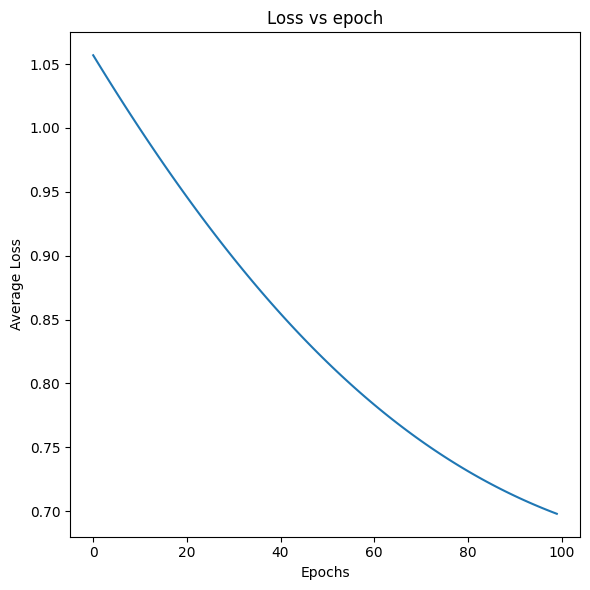

In [9]:
tr.plot_loss()


In [10]:
tr.binary_classification_accuracy(test_data=test_X, test_label=test_y)

TypeError: 'int' object is not iterable

In [12]:
from math import ceil

ceil(300* 0.667)

201

In [11]:
300* 0.667

200.10000000000002

In [8]:
rand_df

,Unnamed: 0,x_0,x_1,x_2,x_3,y
192,192,2.550142,1.890229,1.248802,1.551300,1.0
146,146,2.228708,2.539099,2.514468,2.005175,1.0
91,91,0.611223,0.133525,-0.240514,-0.111338,0.0
124,124,1.934947,2.121059,1.812426,1.199082,1.0
151,151,2.410124,2.048161,0.839703,1.169201,1.0
...,...,...,...,...,...,...
60,60,-0.336230,-0.249016,-0.594430,0.349229,0.0
12,12,0.380519,-0.430613,0.393164,-0.563413,0.0
138,138,2.400282,1.898552,2.410161,1.947828,1.0
47,47,0.388745,0.558508,0.539809,0.078352,0.0


In [9]:
from src.utils.data_split import train_test_split

tr_Data, test_data = train_test_split(rand_df, 0.7)

In [20]:
tr_Data, test_data = train_test_split(rand_df, 0.59)

ValueError: The value must be between 0.6 and 0.9. Provided 0.59.